## 1. Business Ploblem Understanding

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Data Understanding
### 2.1 Data Collection

In [2]:
df = pd.read_excel('/content/insurance.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Multiple Linear Regression

## 3. Data Preprocessing
### 3.1 EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


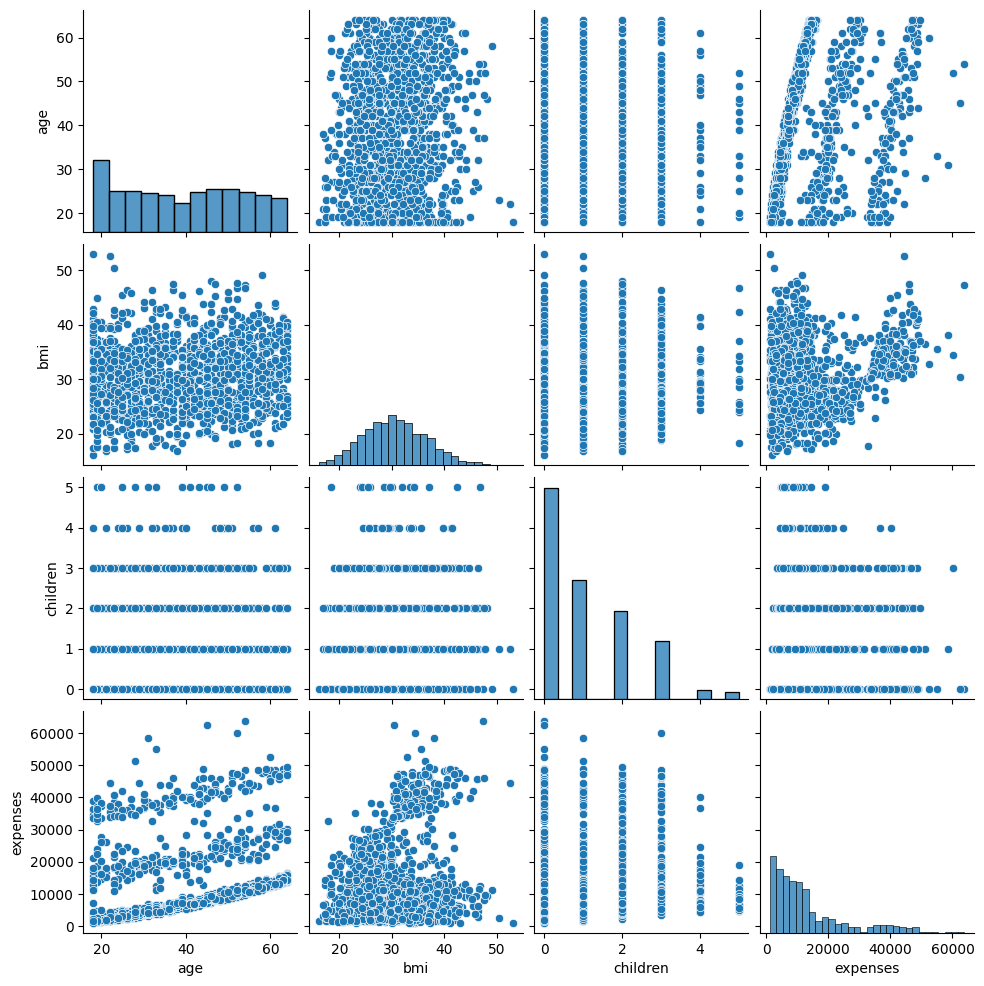

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr(numeric_only=True)

,age,bmi,children,expenses
age,1.000000,0.109341,0.042469,0.299008
bmi,0.109341,1.000000,0.012645,0.198576
children,0.042469,0.012645,1.000000,0.067998
expenses,0.299008,0.198576,0.067998,1.000000


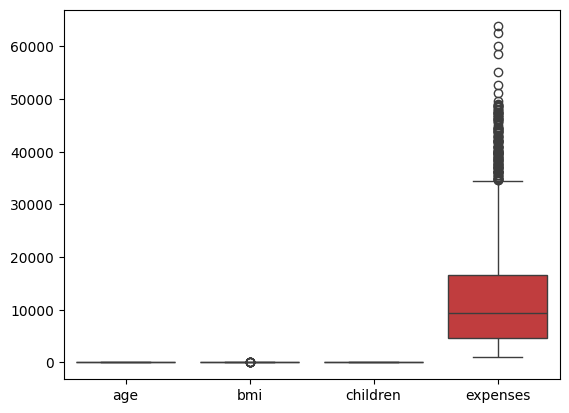

In [8]:
sns.boxplot(data=df) # Checking the Outliers
plt.show()

In [9]:
df.skew(numeric_only=True)

age         0.055673
bmi         0.284593
children    0.938380
expenses    1.515880
dtype: float64

### 3.2 Data Cleaning

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

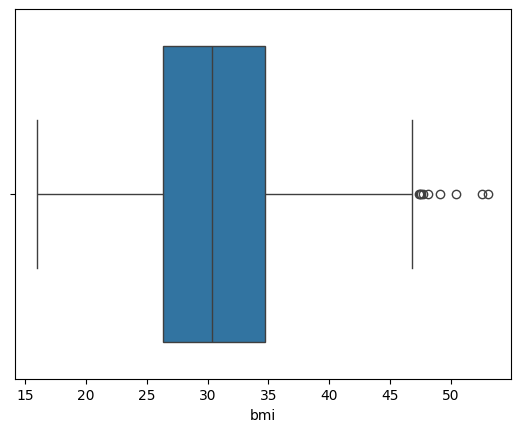

In [11]:
# clearing the outliers
sns.boxplot(x=df['bmi'])
plt.show()

In [12]:
q1 = df['bmi'].quantile(0.25)
q3 = df['bmi'].quantile(0.75)
iqr = q3-q1
lower_limit = q1 - (iqr*1.5)
upper_limit = q3 + (iqr*1.5)
print(q1,q3,iqr,lower_limit,upper_limit)

26.3 34.7 8.400000000000002 13.699999999999998 47.300000000000004


In [13]:
df[df['bmi']>47.300000000000004] # Outliers of the Variable

,age,sex,bmi,children,smoker,region,expenses
116,58,male,49.1,0,no,southeast,11381.33
286,46,female,48.1,2,no,northeast,9432.93
401,47,male,47.5,1,no,southeast,8083.92
543,54,female,47.4,0,yes,southeast,63770.43
847,23,male,50.4,1,no,southeast,2438.06
860,37,female,47.6,2,yes,southwest,46113.51
1047,22,male,52.6,1,yes,southeast,44501.40
1088,52,male,47.7,1,no,southeast,9748.91
1317,18,male,53.1,0,no,southeast,1163.46


In [14]:
df = df[(df['bmi']> lower_limit) & (df['bmi'] < upper_limit)] # removing the outliers
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


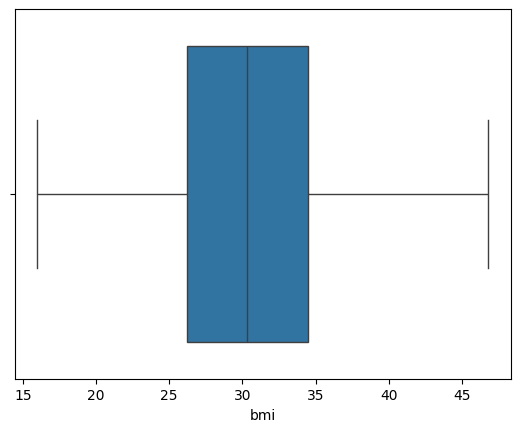

In [15]:
sns.boxplot(x=df['bmi'])
plt.show()

In [16]:
df.drop('region',axis=1,inplace=True)

### 3.3 Data Wrangling

In [17]:
df['sex'].replace({'female':0,'male':1},inplace=True)
df['smoker'].replace({'no':0,'yes':1},inplace=True)

### 3.4 Train Test Split

In [18]:
x = df.drop('expenses',axis=1)
y = df['expenses']

In [19]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y, test_size = 0.2, random_state = 42)

In [20]:
x_test

,age,sex,bmi,children,smoker
899,19,0,22.5,0,0
115,60,1,28.6,0,0
529,18,1,25.5,0,0
176,38,1,27.8,2,0
63,28,0,25.9,1,0
...,...,...,...,...,...
867,57,1,43.7,1,0
558,35,0,34.1,3,1
1028,54,1,31.6,0,0
585,33,0,28.3,1,0


## 4. Modelleing and Evoluation

In [21]:
# Modeling with default paramaters
from sklearn.linear_model import LinearRegression
mlr_model = LinearRegression()
mlr_model.fit(x_train,y_train)

# Prediction
train_predictions = mlr_model.predict(x_train)
test_predictions = mlr_model.predict(x_test)

# Evaluation
from sklearn.model_selection import cross_val_score
mlr_train = mlr_model.score(x_train,y_train)
mlr_test = mlr_model.score(x_test,y_test)
mlr_cv = cross_val_score(mlr_model,x,y,cv=5).mean()

print('Train R2: ',mlr_train)
print('Test R2: ',mlr_test)
print("CV Score: ",mlr_cv)

Train R2:  0.7436049992264148
Test R2:  0.768277484877281
CV Score:  0.7458418619962311


## Check for Assumptions
### 1.Linearity of Errors

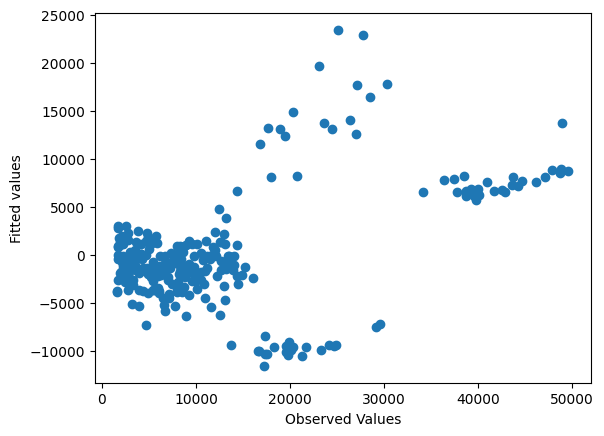

In [22]:
test_res = y_test - test_predictions
plt.scatter(y_test,test_res)
plt.xlabel("Observed Values")
plt.ylabel("Fitted values")
plt.show()

### 2.Normality of Errors

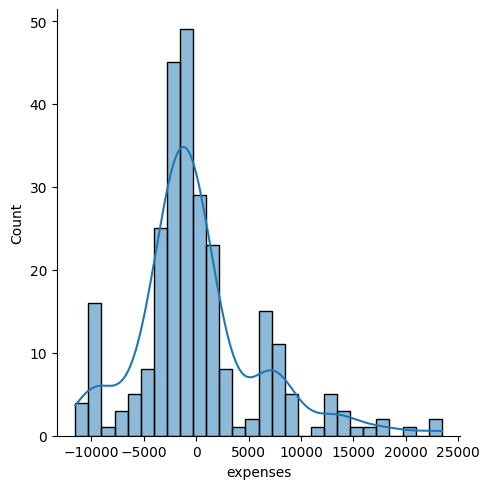

In [23]:
sns.displot(test_res,kde=True)
plt.show()

### 3.Equal variance of errors (Homoscadesicity)

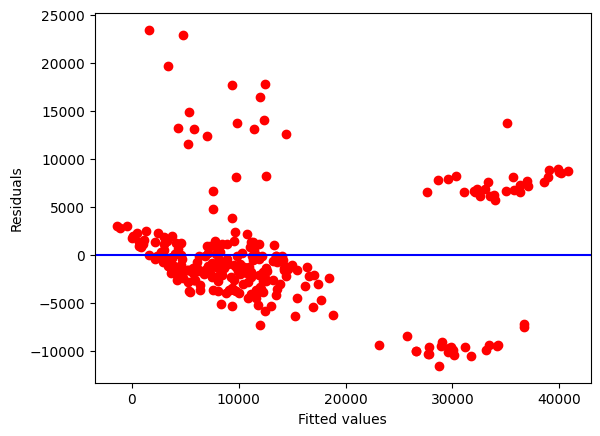

In [24]:
plt.scatter(test_predictions,test_res,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.show()

### 4.Variables significance

In [25]:
import statsmodels.formula.api as smf
mod=smf.ols("y~x",data=df).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     788.5
Date:                Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                        15:16:32   Log-Likelihood:                -13450.
No. Observations:                1329   AIC:                         2.691e+04
Df Residuals:                    1323   BIC:                         2.694e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -1.21e+04    964.025    -12.554      0.000    -1.4e+04   -1.02e+04
x[0]         257.0460     11.864     21.666      0.000     233.771     280.321
x[1]         -36.8547    332.019     -0.111      0.912    -688.195     614.486
x[2]         324.7149     28.140     11.539      0.000     269.511     379.919
x[3]         477.1451    137.039      3.482      0.001     208.307     745.983
x[4]        2.362e+04    411.630     57.377      0.000    2.28e+04    2.44e+04
==============================================================================
Omnibus:                      304.856   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.634
Skew:                           1.236   Prob(JB):                    2.21e-159
Kurtosis:                       5.661   Cond. No.                         299.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Polynomial Regression

## 3. Preprocessing

In [26]:
from sklearn.preprocessing import PolynomialFeatures
Poly_converter= PolynomialFeatures(degree=2,include_bias=False)
Poly_x = pd.DataFrame(Poly_converter.fit_transform(x))

### Train Test Split

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(Poly_x,y,test_size=0.2,random_state=42)

## 4. Modelleing and Evoluation

In [28]:
# Modeling with default paramaters
from sklearn.linear_model import LinearRegression
poly_model = LinearRegression()
poly_model.fit(x_train,y_train)

# Prediction
train_predictions = poly_model.predict(x_train)
test_predictions = poly_model.predict(x_test)

# Evaluation
print('Train R2: ',poly_model.score(x_train,y_train))
print('Test R2: ',poly_model.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("CV Score: ",cross_val_score(poly_model,x,y,cv=5).mean())

Train R2:  0.8369153487751684
Test R2:  0.8561470786317726
CV Score:  0.7458418619962311


### Ploy HyperParameter Tuning

In [29]:
train_r2=[]
test_r2=[]
for i in range(1,10):
    from sklearn.preprocessing import PolynomialFeatures
    Poly_converter= PolynomialFeatures(degree=i,include_bias=False)
    Poly_x = pd.DataFrame(Poly_converter.fit_transform(x))

    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(Poly_x,y,test_size=0.2,random_state=42)

    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(x_train,y_train)

    test_r2.append(model.score(x_test,y_test))
    train_r2.append(model.score(x_train,y_train))

print(pd.DataFrame([test_r2,train_r2]))

          0         1         2         3         4         5           6  \
0  0.768277  0.856147  0.853815  0.847705  0.766139  0.399658 -188.797616   
1  0.743605  0.836915  0.843785  0.856941  0.870320  0.881784    0.896520   

             7             8  
0 -2047.899405 -18944.226103  
1     0.904957      0.898268  


###  Rebuilding Model with best HPT Parameters

In [30]:
final_Poly_converter= PolynomialFeatures(degree=4,include_bias=False)
Pol_x = final_Poly_converter.fit_transform(x)

x_train,x_test,y_train,y_test = train_test_split(Pol_x,y,test_size=0.2,random_state=42)

final_model = LinearRegression()
final_model.fit(x_train,y_train)


poly_train = final_model.score(x_train,y_train)
poly_test = final_model.score(x_test,y_test)
poly_cv = cross_val_score(final_model,x,y,cv=5).mean()

print('Train R2: ',poly_train)
print('Test R2: ',poly_test)
print("CV Score: ",poly_cv)

Train R2:  0.8569408723742798
Test R2:  0.8477046103010456
CV Score:  0.7458418619962311


# Lasso Regression

## 4. Modeling and Evaluation

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
# Modeling with default paramaters
from sklearn.linear_model import Lasso
lasso_base = Lasso()
lasso_base.fit(x_train,y_train)

# Prediction
train_predictions = lasso_base.predict(x_train)
test_predictions = lasso_base.predict(x_test)

# Evaluation
print('Train R2: ',lasso_base.score(x_train,y_train))
print('Test R2: ',lasso_base.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("CVS: ",cross_val_score(lasso_base,x,y,cv=5).mean() )

Train R2:  0.7436049167576863
Test R2:  0.7682845084591609
CVS:  0.7458481242772766


In [33]:
# HyperParameter tuning
from sklearn.model_selection import GridSearchCV

estimator = Lasso()

#param_grid = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,50,100]}
param_grid = {"alpha":list(range(1,100))}

model_hp = GridSearchCV(estimator,param_grid,cv = 5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 27}

In [34]:
# Final Modeling with best HyperParameter tuning parameters
from sklearn.linear_model import Lasso
lasso_final = Lasso(alpha=27)
lasso_final.fit(x_train,y_train)

print('Intercepr: ',lasso_final.intercept_)
print('Coefficients: ',lasso_final.coef_)

# Prediction
train_predictions = lasso_final.predict(x_train)
test_predictions = lasso_final.predict(x_test)

# Evaluation

lasso_train = lasso_final.score(x_train,y_train)
lasso_test = lasso_final.score(x_test,y_test)
lasso_cv = cross_val_score(lasso_final,x,y,cv=5).mean()

print('Train R2: ',lasso_train)
print('Test R2: ',lasso_test)
print("CV Score: ",lasso_cv)

Intercepr:  -11800.259640347304
Coefficients:  [  257.25689231    -0.           313.71245413   496.51744208
 23445.34029312]
Train R2:  0.7435483160182876
Test R2:  0.7684044851038989
CV Score:  0.745964401137262


# Ridge Regression

In [35]:
# Modeling with default paramaters
from sklearn.linear_model import Ridge
ridge_base = Ridge()
ridge_base.fit(x_train,y_train)

# Prediction
train_predictions = ridge_base.predict(x_train)
test_predictions = ridge_base.predict(x_test)

# Evaluation
print('Train R2: ',ridge_base.score(x_train,y_train))
print('Test R2: ',ridge_base.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("CV Score: ",cross_val_score(ridge_base,x,y,cv=5).mean())

Train R2:  0.7435838281857797
Test R2:  0.7682654944819229
CV Score:  0.7458250060836376


In [36]:
# HyperParameter tuning
from sklearn.model_selection import GridSearchCV

estimator = Ridge()

param_grid = {"alpha":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,10,20,30,50,100]}

model_hp = GridSearchCV(estimator,param_grid,cv = 5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 0.3}

In [37]:
# Rebuildibg the final model with best HyperParameter tuning parameters

# Modeling with default paramaters
ridge_final = Ridge(alpha=0.3)
ridge_final.fit(x_train,y_train)

# Prediction
train_predictions = ridge_final.predict(x_train)
test_predictions = ridge_final.predict(x_test)

# Evaluation

ridge_train = ridge_final.score(x_train,y_train)
ridge_test = ridge_final.score(x_test,y_test)
ridge_cv = cross_val_score(ridge_final,x,y,cv=5).mean()

print('Train R2: ',ridge_train)
print('Test R2: ',ridge_test)
print("CV Score: ",ridge_cv)

Train R2:  0.7436030782325043
Test R2:  0.7682781284991226
CV Score:  0.7458412533777042


# ElasticNet Regression

In [38]:
# Modeling with default paramaters
from sklearn.linear_model import ElasticNet
ElasticNet_base = ElasticNet()
ElasticNet_base.fit(x_train,y_train)

# Prediction
train_predictions = ElasticNet_base.predict(x_train)
test_predictions = ElasticNet_base.predict(x_test)

# Evaluation
print('Train R2: ',ElasticNet_base.score(x_train,y_train))
print('Test R2: ',ElasticNet_base.score(x_test,y_test))

from sklearn.model_selection import cross_val_score
print("CV Score: ",cross_val_score(ElasticNet_base,x,y,cv=5).mean())

Train R2:  0.3823176876430222
Test R2:  0.42375809808088793
CV Score:  0.3869970168655764


In [39]:
# HyperParameter tuning
from sklearn.model_selection import GridSearchCV

estimator = ElasticNet()

param_grid = {"alpha":list(range(1,100)),
              'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

model_hp = GridSearchCV(estimator,param_grid,cv = 5,scoring='neg_mean_squared_error')
model_hp.fit(x_train,y_train)
model_hp.best_params_

{'alpha': 27, 'l1_ratio': 1}

In [40]:
# Rebuildibg the final model with best HyperParameter tuning parameters

ElasticNet_best = ElasticNet(alpha=27,l1_ratio=1)
ElasticNet_best.fit(x_train,y_train)

# Prediction
train_predictions = ElasticNet_best.predict(x_train)
test_predictions = ElasticNet_best.predict(x_test)

# Evaluation

enr_train = ElasticNet_best.score(x_train,y_train)
enr_test = ElasticNet_best.score(x_test,y_test)
enr_cv = cross_val_score(ElasticNet_best,x,y,cv=5).mean()

print('Train R2: ',enr_train)
print('Test R2: ',enr_test)
print("CV Score: ",enr_cv)

Train R2:  0.7435483160182876
Test R2:  0.7684044851038989
CV Score:  0.745964401137262


In [41]:
d1 = {'Algorithms':['Multiple Linear Regression','Polynomial Regression','Lasso Regression','Ridge Regression','ElasticNet Regression'],
      'Train R2':[mlr_train,poly_train,lasso_train,ridge_train,enr_train],
      'Test R2':[mlr_test,poly_test,lasso_test,ridge_test,enr_test],
      'CV Scores':[mlr_cv,poly_cv,lasso_cv,ridge_cv,enr_cv],
      'Assumption for SLR and MLR':['No','NaN','NaN','NaN','NaN']}
all_frame = pd.DataFrame(d1)
all_frame

,Algorithms,Train R2,Test R2,CV Scores,Assumption for SLR and MLR
0,Multiple Linear Regression,0.743605,0.768277,0.745842,No
1,Polynomial Regression,0.856941,0.847705,0.745842,NaN
2,Lasso Regression,0.743548,0.768404,0.745964,NaN
3,Ridge Regression,0.743603,0.768278,0.745841,NaN
4,ElasticNet Regression,0.743548,0.768404,0.745964,NaN
